## Assesment 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [2]:
train = pd.read_excel('Passenger.xlsx')
print(train)

       Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]


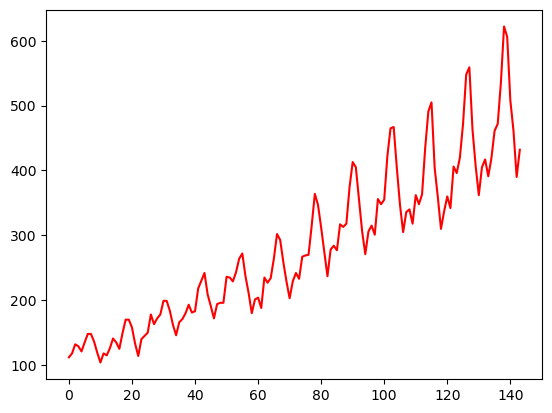

In [3]:
plt.plot(train["#Passengers"],color="red")

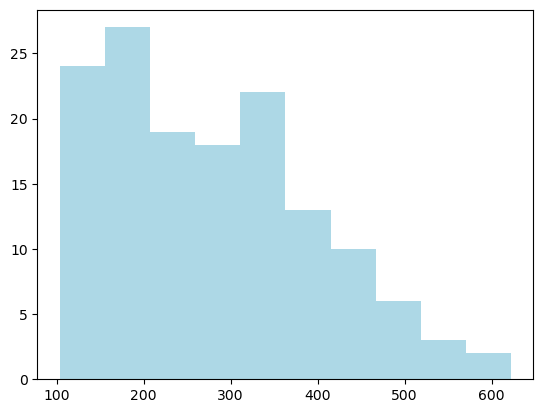

In [5]:
plt.hist(train["#Passengers"],color="lightblue")
plt.show()

In [20]:
#Split the data
train_1=train[0:72]
train_2=train[72:]
#check mean and vari

#Augmented Dickey - Fuller statistic to check stationarity
#Null Hypothesis: The time series data is non-stationary
#Alternative Hypothesis: The time series data is stationary
train=train.dropna()
t = train["#Passengers"].values
result = adfuller(t)
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
#If the p-value is less than or equal to 0.05, you reject H0 and conclude that the time series is stationary.
#If the p-value is greater than 0.05 , you fail to reject H0 and conclude that the time series is not stationary.

ADF Statistic: 0.815369
p-value: 0.991880


In [21]:
# checking the Mean and variance of the splited data

print(train_1['#Passengers'].describe())
print(train_2['#Passengers'].describe())


count     72.000000
mean     182.902778
std       47.704241
min      104.000000
25%      144.000000
50%      180.000000
75%      220.250000
max      302.000000
Name: #Passengers, dtype: float64
count     72.000000
mean     377.694444
std       86.439206
min      233.000000
25%      314.500000
50%      361.000000
75%      420.500000
max      622.000000
Name: #Passengers, dtype: float64


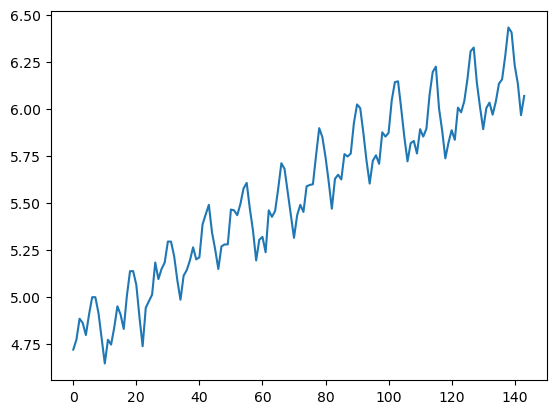

In [7]:
x =np.log(train["#Passengers"])
plt.plot(x)

##  1st order difference

<Axes: >

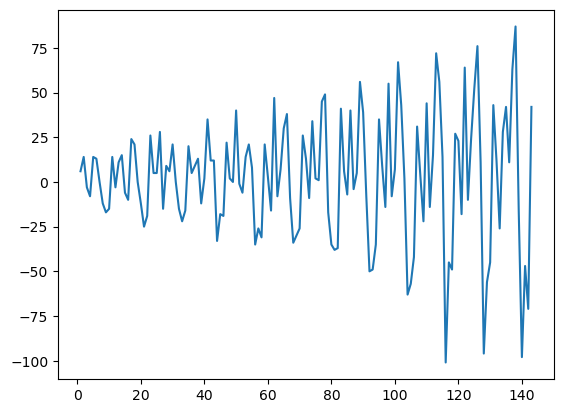

In [8]:
train['Passenger_diff']= train['#Passengers']-train['#Passengers'].shift(1)
train['Passenger_diff'].plot()

In [9]:
train=train.dropna()
t = train["Passenger_diff"].values
result = adfuller(t)
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.829267
p-value: 0.054213


## Power Transformation

ADF Statistic: -2.877449
p-value: 0.048034


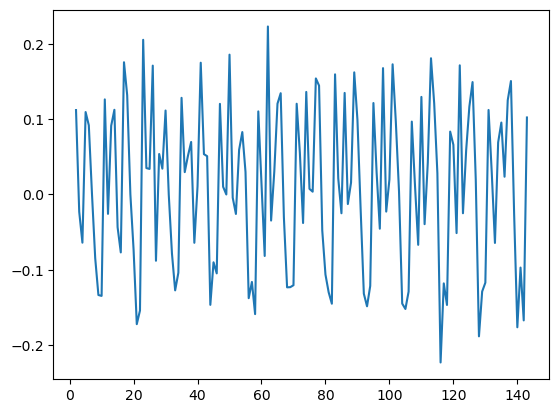

In [12]:
#Power Transformation
train['Passengers_log'] = np.log(train['#Passengers'])
train['Passengers_log_diff'] = train['Passengers_log'] - train['Passengers_log'].shift(1)
train['Passengers_log_diff'].plot()
result = adfuller(train['Passengers_log_diff'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

scaled value -> geometric mean
stationality / non stationality(mean1 != mean2, var1 != var2, actual graph, test statistics, histogram)
